<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/Metricas_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Regressão em Machine Learning

Em problemas de regressão, o objetivo de um modelo é prever valores contínuos. Para avaliar o desempenho desses modelos, utilizamos **métricas de regressão** que quantificam o quão próximas as previsões estão dos valores reais.

## 1. Erro Absoluto Médio (MAE – *Mean Absolute Error*)

Mede a média das diferenças absolutas entre os valores previstos e os reais.  
Interpretação direta: em média, o modelo erra "tanto".

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**Prós**: fácil de entender, menos sensível a outliers que o MSE.  
**Contras**: não penaliza grandes erros com tanta força.

**Exemplo:**  
Se o modelo prevê `100`, `105` e `90` para valores reais `110`, `100` e `95`, o MAE será:

$$
\frac{|110 - 100| + |100 - 105| + |95 - 90|}{3} = \frac{10 + 5 + 5}{3} = 6{,}67
$$

---

## 2. Erro Quadrático Médio (MSE – *Mean Squared Error*)

Mede a média dos quadrados dos erros entre as previsões e os valores reais.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Prós**: penaliza erros grandes com mais intensidade.  
**Contras**: sensível a outliers.

---

## 3. Raiz do Erro Quadrático Médio (RMSE – *Root Mean Squared Error*)

É a raiz quadrada do MSE. Tem a mesma unidade dos dados, facilitando a interpretação.

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Prós**: penaliza mais fortemente grandes erros, mas mantém a unidade original dos dados.  
**Contras**: ainda sensível a outliers.

---

## 4. Erro Absoluto Mediano (MedAE – *Median Absolute Error*)

Usa a **mediana** em vez da média dos erros absolutos.

$$
\text{MedAE} = \text{mediana}(|y_i - \hat{y}_i|)
$$

**Prós**: mais robusto a outliers que o MAE.  
**Contras**: menos interpretável quando a distribuição de erros não é simétrica.

---

## 5. Coeficiente de Determinação (R²)

Mede a proporção da variância dos dados que é explicada pelo modelo.

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- Varia de **-∞ a 1**.
- Quanto mais próximo de 1, melhor.
- Um R² negativo indica que o modelo está pior que uma predição constante com a média dos valores.

**Exemplo:**  
Se $( R^2 = 0{,}85 $), o modelo explica 85% da variância dos dados.

---

## Comparativo das Métricas

| Métrica   | Quando usar                                                  |
|-----------|--------------------------------------------------------------|
| **MAE**   | Quando todos os erros têm a mesma importância                |
| **MSE**   | Quando erros grandes são mais graves                         |
| **RMSE**  | Quando queremos penalizar erros grandes com mesma unidade    |
| **MedAE** | Quando há muitos outliers nos dados                          |
| **R²**    | Quando queremos entender a capacidade explicativa do modelo  |

---




In [1]:
# Regressão


from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import numpy as np

# Valores reais e previstos
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MedAE: {medae}")
print(f"R²: {r2}")


MAE: 0.5
MSE: 0.375
RMSE: 0.6123724356957945
MedAE: 0.5
R²: 0.9486081370449679


Valores reais (y_true): [ 0.76405235  1.90015721  4.97873798  8.7408932  10.86755799]
Valores previstos (y_pred): [2.    3.875 5.75  7.625 9.5  ]

MAE = 1.29
MSE = 1.83
RMSE = 1.35
R² = 0.88


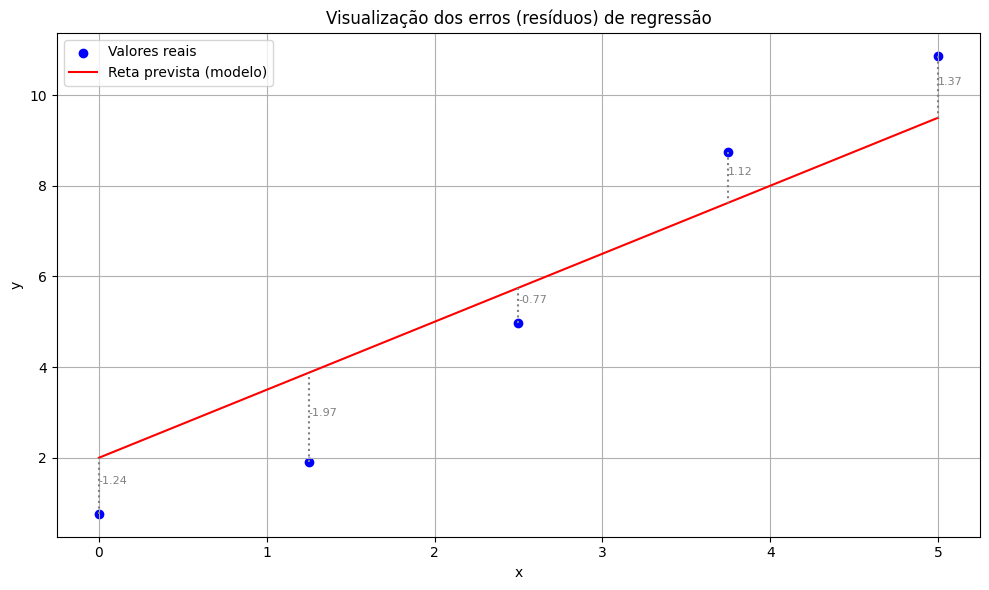

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Gerar 10 pontos com relação linear e ruído
np.random.seed(0)
x = np.linspace(0, 5, 5)
y_true = 2 * x - 1 + np.random.normal(0, 1, size=x.shape)  # y = 2x + 1 + ruído

# Modelo hipotético: reta errada
y_pred = 1.5 * x + 2  # reta incorreta

# Calcular métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Mostrar valores
print("Valores reais (y_true):", y_true)
print("Valores previstos (y_pred):", y_pred)
print(f"\nMAE = {mae:.2f}")
print(f"MSE = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² = {r2:.2f}")

# Gráfico com linhas verticais mostrando os erros
plt.figure(figsize=(10, 6))
plt.scatter(x, y_true, color='blue', label='Valores reais')
plt.plot(x, y_pred, color='red', label='Reta prevista (modelo)')
plt.title("Visualização dos erros (resíduos) de regressão")
plt.xlabel("x")
plt.ylabel("y")

# Adicionar linhas verticais mostrando os erros (resíduos)
for xi, yi_true, yi_pred in zip(x, y_true, y_pred):
    plt.plot([xi, xi], [yi_true, yi_pred], color='gray', linestyle='dotted')

# Anotar alguns erros como texto no gráfico
for xi, yi_true, yi_pred in zip(x, y_true, y_pred):
    error = yi_true - yi_pred
    plt.text(xi, (yi_true + yi_pred) / 2, f"{error:.2f}", fontsize=8, ha='left', va='bottom', color='gray')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar o dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
data = pd.read_csv(url, index_col=0)



MAE: 2.55
MSE: 10.51
RMSE: 3.24
R²: 0.61
Métricas calculadas manualmente:
MAE: 2.55
MSE: 10.51
RMSE: 3.24
R²: 0.6119


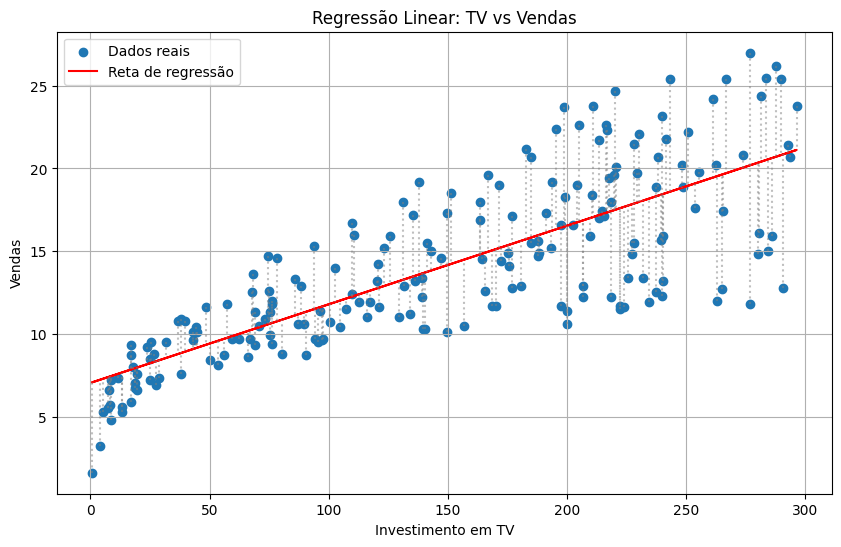

In [18]:
X = data[['TV']]
y = data['sales']

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X, y)

# Previsões
y_pred = model.predict(X)

# Calcular métricas
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


# =====================
# CÁLCULO MANUAL DAS MÉTRICAS
# =====================

# Erros
errors = y - y_pred

# MAE: média dos erros absolutos
mae_manual = np.mean(np.abs(errors))

# MSE: média dos quadrados dos erros
mse_manual = np.mean(errors ** 2)

# RMSE: raiz quadrada do MSE
rmse_manual = np.sqrt(mse_manual)

# R²: coeficiente de determinação
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2_manual = 1 - (ss_residual / ss_total)

# =====================
# RESULTADOS
# =====================

print("Métricas calculadas manualmente:")
print(f"MAE: {mae_manual:.2f}")
print(f"MSE: {mse_manual:.2f}")
print(f"RMSE: {rmse_manual:.2f}")
print(f"R²: {r2_manual:.4f}")




# Plot dos dados e da regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dados reais')
plt.plot(X, y_pred, color='red', label='Reta de regressão')
for xi, yi, ypi in zip(X.values.flatten(), y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='dotted', alpha=0.5)
plt.title("Regressão Linear: TV vs Vendas")
plt.xlabel("Investimento em TV")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.show()


# Exercícios

1. Calcular a métrica de avaliação para as outras colunas mídias: **radio e newspaper**. O comportamento é semelhante?

2. Fazer um experimento para o dataset [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance) para cálculo do plano de saúde. Foque em aplicar um método simples (Regressão Linear) e aplicar as métricas de avaliação como demonstrado no exemplo anterior.